# Klasyfikacja gwiazd - EDA


### Pakiety 

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Podział danych na zbiór treningowy i testowy

In [45]:
# wczytanie danych
df = pd.read_csv('./data/development_data.csv')

# podział danych na zbiór treningowy i testowy
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# reset indeksów
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

### Informacje o kolumnach 
źródło: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download

obj_ID = identyfikator obiektu, unikalna wartość identyfikująca obiekt w katalogu obrazów używanym przez CAS

alpha = kąt prawego wzniesienia (w epoce J2000)

delta = kąt deklinacji (w epoce J2000)

u = Filtr ultrafioletowy w systemie fotometrycznym

g = filtr zielony w systemie fotometrycznym

r = filtr czerwony w systemie fotometrycznym

i = Filtr bliskiej podczerwieni w systemie fotometrycznym

z = Filtr podczerwieni w systemie fotometrycznym

run_ID = numer przebiegu używany do identyfikacji konkretnego skanu

rereun_ID = numer ponownego uruchomienia określający sposób przetworzenia obrazu

cam_col = kolumna kamery do identyfikacji linii skanowania w przebiegu

field_ID = numer pola do identyfikacji każdego pola

spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)

class = klasa obiektu (galaktyka, gwiazda lub kwazar)

redshift = wartość przesunięcia ku czerwieni oparta na wzroście długości fali

plate = identyfikator tablicy, identyfikuje każdą tablicę w SDSS

MJD = zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany

fiber_ID = identyfikator włókna identyfikujący włókno, które skierowało światło na płaszczyznę ogniskową w każdej obserwacji



### Podstawowe informacje o danych
Zauważamy, że nie ma brakujących danych. Wszystkie typy są liczbowe (int lub float), z wyjątkiem kolumny 'class'.

In [46]:
train_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237651e+18,147.392648,0.145509,23.62785,21.78850,21.73961,21.88235,21.43752,1239,301,4,181,4.308885e+18,QSO,2.333820,3827,55565,240
1,1.237665e+18,157.156740,35.327317,18.60880,17.52187,17.12905,16.95103,16.89711,4518,301,6,192,2.204664e+18,GALAXY,0.043298,1958,53385,553
2,1.237667e+18,94.688025,63.535297,18.16716,16.51485,15.75641,15.35805,15.23041,5060,301,1,100,2.588464e+18,STAR,-0.000342,2299,53711,74
3,1.237655e+18,214.420238,-1.506597,19.83027,18.47293,17.82672,17.48600,17.26200,2334,301,5,124,1.032563e+18,GALAXY,0.081886,917,52400,411
4,1.237668e+18,204.749167,17.703206,19.33024,18.16558,17.74244,17.48129,17.32534,5314,301,1,181,2.935343e+18,GALAXY,0.061780,2607,54184,443
5,1.237680e+18,9.472956,27.896687,21.84835,21.25768,21.25116,20.99355,20.66064,8103,301,5,152,7.073156e+18,QSO,0.825294,6282,56572,920
6,1.237679e+18,6.514320,3.725924,22.89606,23.08747,21.51780,20.37108,19.72461,7712,301,6,373,9.848332e+18,GALAXY,0.552285,8747,57401,311
7,1.237663e+18,322.397605,0.185066,18.85759,17.69771,17.27650,17.04447,16.80128,4187,301,4,98,1.112519e+18,GALAXY,0.030239,988,52520,473
8,1.237661e+18,127.444409,28.226463,22.28067,22.19123,21.79689,21.05735,20.96889,3560,301,4,132,1.082237e+19,GALAXY,0.971070,9612,57801,798
9,1.237664e+18,15.845389,-0.696173,18.09889,16.67957,16.11639,15.88822,15.82032,4263,301,2,221,2.604293e+18,STAR,0.000112,2313,53726,315


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       49000 non-null  float64
 1   alpha        49000 non-null  float64
 2   delta        49000 non-null  float64
 3   u            49000 non-null  float64
 4   g            49000 non-null  float64
 5   r            49000 non-null  float64
 6   i            49000 non-null  float64
 7   z            49000 non-null  float64
 8   run_ID       49000 non-null  int64  
 9   rerun_ID     49000 non-null  int64  
 10  cam_col      49000 non-null  int64  
 11  field_ID     49000 non-null  int64  
 12  spec_obj_ID  49000 non-null  float64
 13  class        49000 non-null  object 
 14  redshift     49000 non-null  float64
 15  plate        49000 non-null  int64  
 16  MJD          49000 non-null  int64  
 17  fiber_ID     49000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [48]:
train_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.0,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000
mean,1.237665e+18,177.604538,24.130549,22.098590,20.640322,19.654032,19.091864,18.774755,4479.874204,301.0,3.510041,185.663082,5.795201e+18,0.576246,5147.062449,55594.878388,448.903694
std,8.424456e+12,96.435544,19.641175,2.253116,2.033170,1.852267,1.755689,1.762076,1961.481078,0.0,1.587281,149.048257,3.326069e+18,0.729714,2954.126386,1807.437362,272.525616
min,1.237646e+18,0.005528,-18.785328,12.101680,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.007352,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.684086,5.256838,20.366730,18.980867,18.158278,17.754460,17.475920,3187.000000,301.0,2.000000,81.000000,2.849788e+18,0.054130,2531.000000,54242.000000,220.000000
50%,1.237663e+18,180.714503,23.667032,22.196395,21.103490,20.134315,19.410960,19.007725,4188.000000,301.0,4.000000,146.000000,5.616045e+18,0.424114,4988.000000,55881.000000,431.000000
75%,1.237668e+18,233.825251,39.834615,23.713487,22.127880,21.041418,20.405950,19.925895,5326.000000,301.0,5.000000,240.000000,8.337758e+18,0.704122,7405.250000,56780.000000,644.000000
max,1.237681e+18,359.999031,82.816030,30.660390,30.607000,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412684e+19,7.011245,12547.000000,58932.000000,1000.000000


### Target
Badamy liczbę występowań różnych wartości w kolumnie 'class', w której mamy 3 możliwe wartości: GALAXY, STAR i QSO.

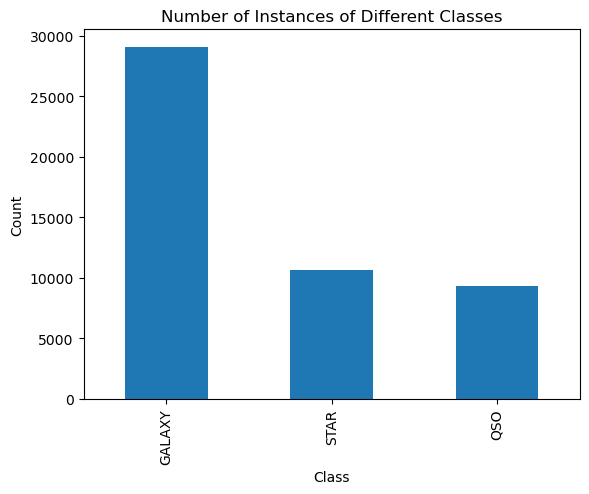

In [49]:
train_df['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances of Different Classes')
plt.show()

### Rozkłady poszczególnych zmiennych
Pomimo, że wszystkie zmienne są typu *float*, to nadal możemy mieć zmienne dyskretne/kategoryczne. Tak jest w przypadku rereun_ID (numer ponownego uruchomienia określający sposób przetworzenia obrazu) i cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu).

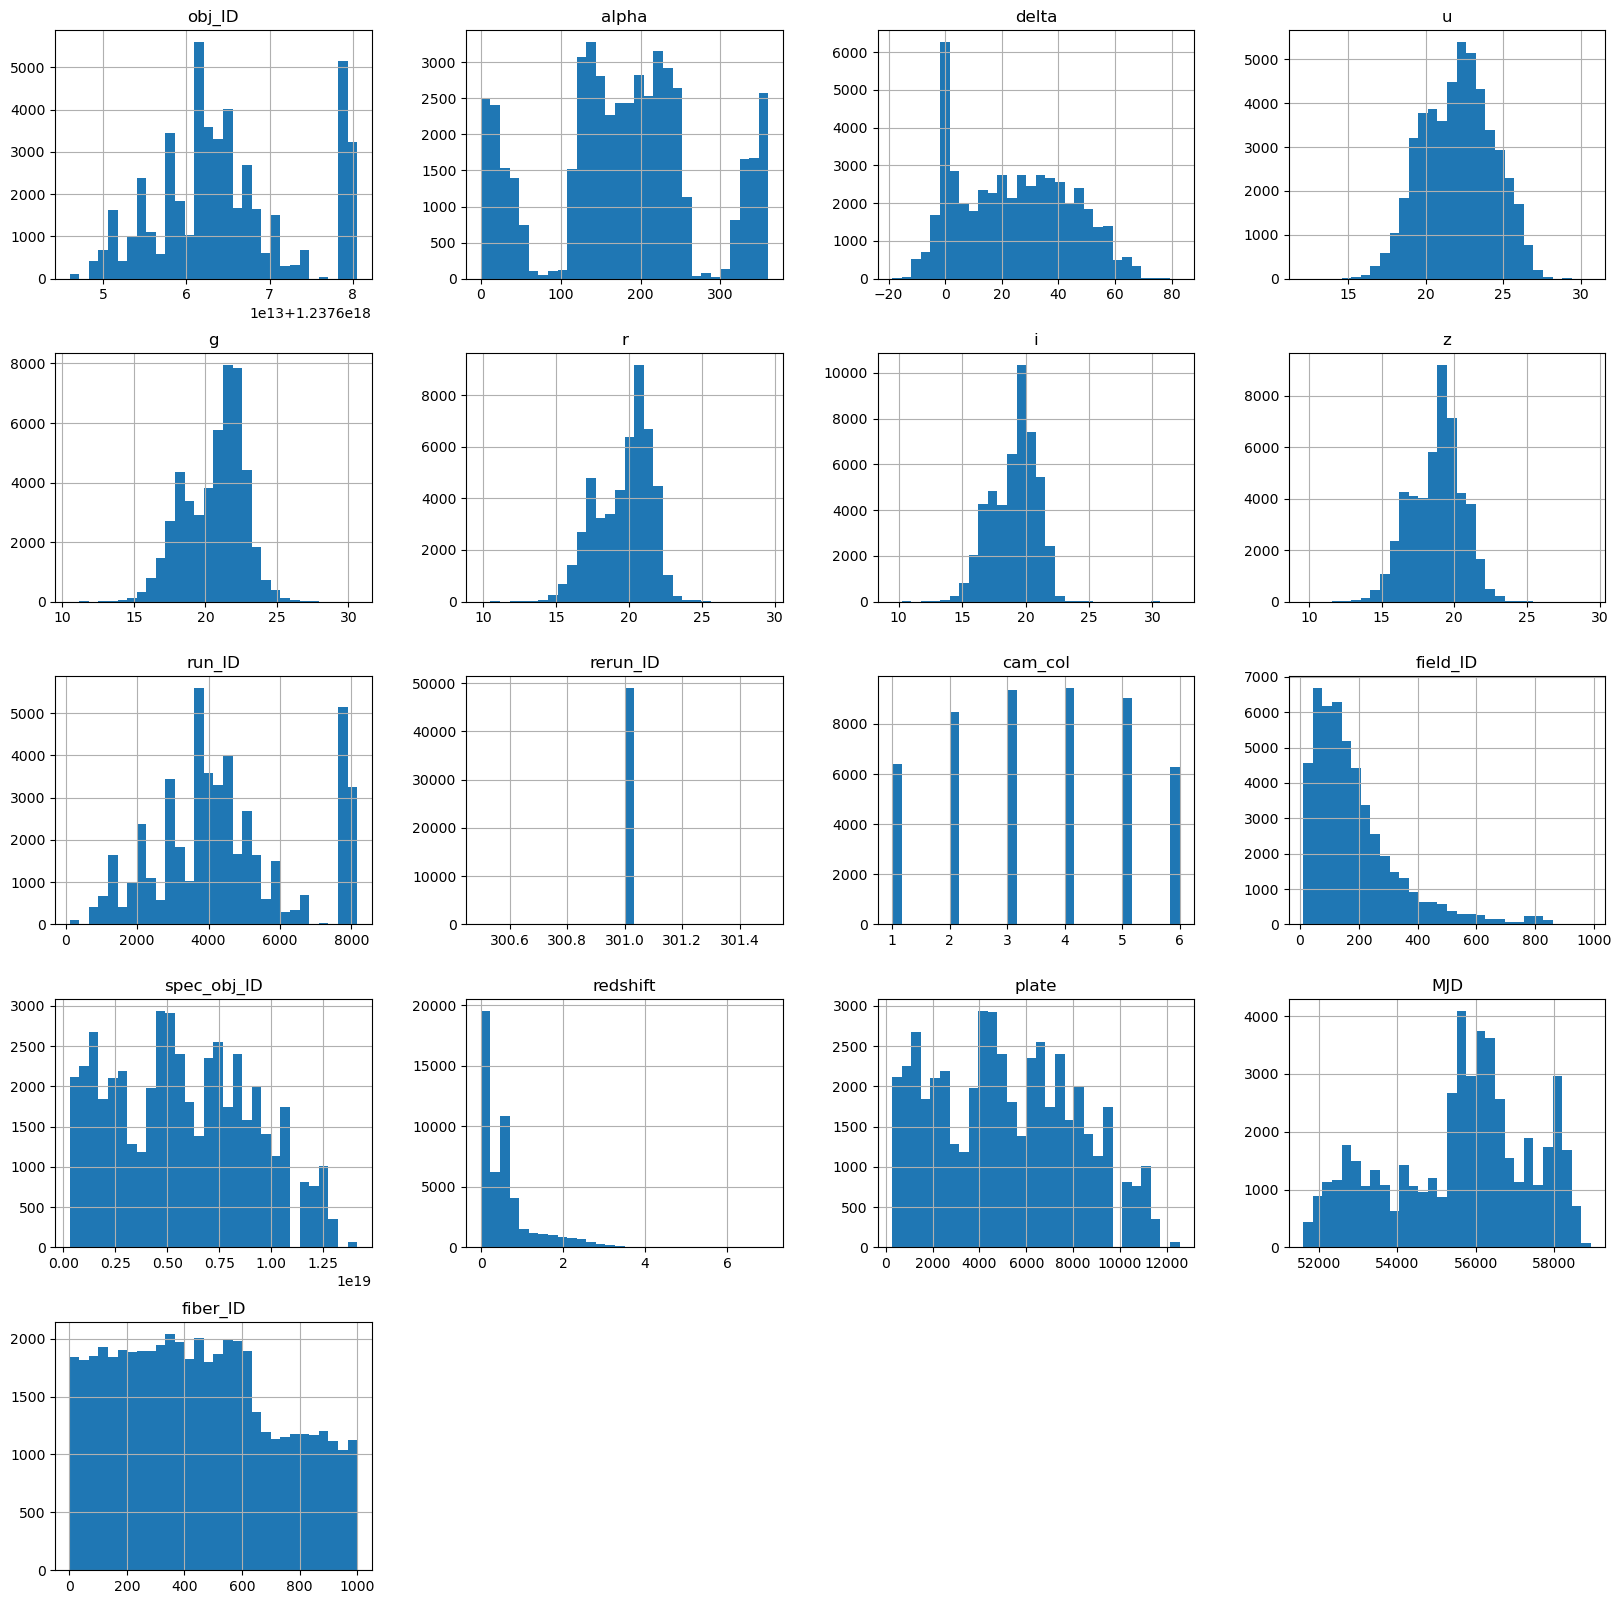

In [50]:
train_df.hist(bins=30, figsize=(20,20))
plt.show()

# Przegląd wizualizacji

## Zalezności między wybranymi dwiema zmiennymi numerycznymi

Scatter plot dla "alpha" (kąt prawego wzniesienia (w epoce J2000)) vs "delta" (delta = kąt deklinacji (w epoce J2000)), aby zobaczyć rozkład obiektów na sferze niebieskiej.

Text(0, 0.5, 'Declination angle (delta)')

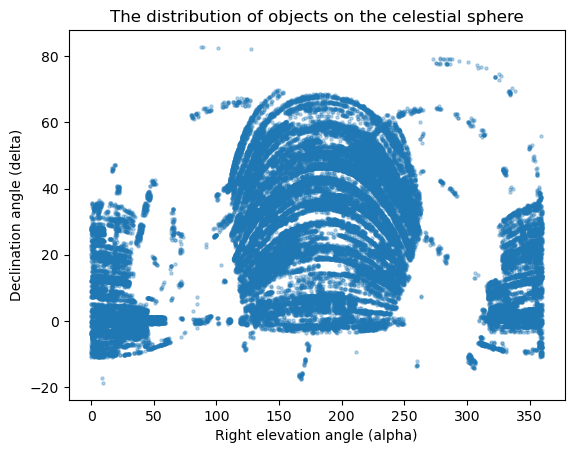

In [51]:
train_df.plot.scatter(x = "alpha", y = "delta", s = 5, alpha = 0.3)
plt.title("The distribution of objects on the celestial sphere")
plt.xlabel("Right elevation angle (alpha)")
plt.ylabel("Declination angle (delta)")

Scatter plot dla kolumny "redshift" (wartość przesunięcia ku czerwieni oparta na wzroście długości fali) i kolumny "MJD" (zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany). Zalezność kolumny "redshift" od kolumny "MJD", zeby zobaczyć jak wartość przesunięcia ku czerwieni zalezy od czasu.

Text(0, 0.5, 'Redshift value')

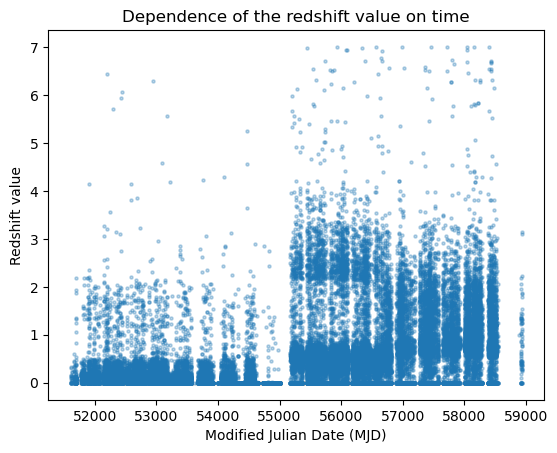

In [52]:
train_df.plot.scatter(x = "MJD", y = "redshift", s = 5, alpha = 0.3)
plt.title("Dependence of the redshift value on time")
plt.xlabel("Modified Julian Date (MJD)")
plt.ylabel("Redshift value")

Scatter plot dla kolumny "redshift" (wartość przesunięcia ku czerwieni oparta na wzroście długości fali) i kolumny "plate" (identyfikator tablicy, identyfikuje każdą tablicę w SDSS). Zalezność kolumny "redshift" od kolumny "plate", zeby zobaczyć jak wartość przesunięcia ku czerwieni zalezy od tablicy.

Text(0, 0.5, 'Redshift value')

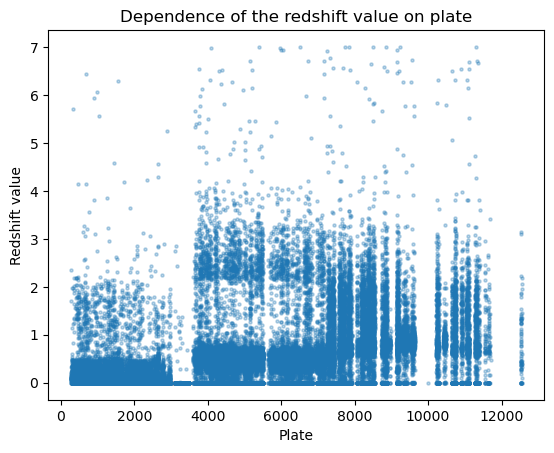

In [53]:
train_df.plot.scatter(x = "plate", y = "redshift", s = 5, alpha = 0.3)
plt.title("Dependence of the redshift value on plate")
plt.xlabel("Plate")
plt.ylabel("Redshift value")


## Zmienne dyskretne

Rozkład klasy obiektu w zależności od zmiennej kategorialnej (dyskretnej) cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu) w postaci wykresu słupkowego.

<Figure size 1000x600 with 0 Axes>

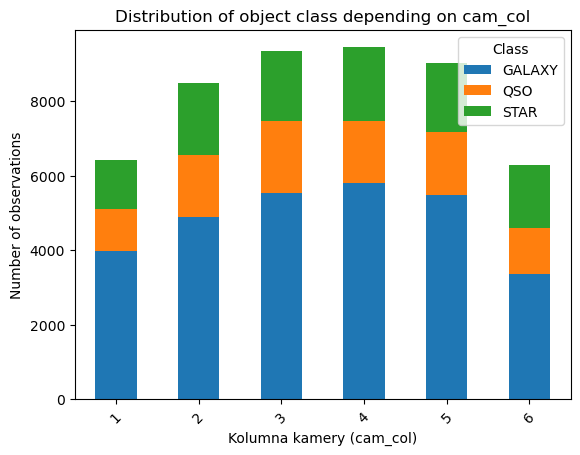

In [54]:
plt.figure(figsize = (10, 6))
train_df.groupby(["cam_col", "class"]).size().unstack().plot(kind = "bar", stacked = True)
plt.title("Distribution of object class depending on cam_col")
plt.xlabel("Camera column (cam_col)")
plt.ylabel("Number of observations")
plt.legend(title = "Class")
plt.xticks(rotation = 45)
plt.show()


Rozkład klasy obiektu w zależności od zmiennej kategorialnej (dyskretnej) "plate" (identyfikator tablicy, identyfikuje każdą tablicę w SDSS) w postaci wykresu słupkowego. (to samo co wyzej jak cos)

ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

<Figure size 1000x600 with 0 Axes>

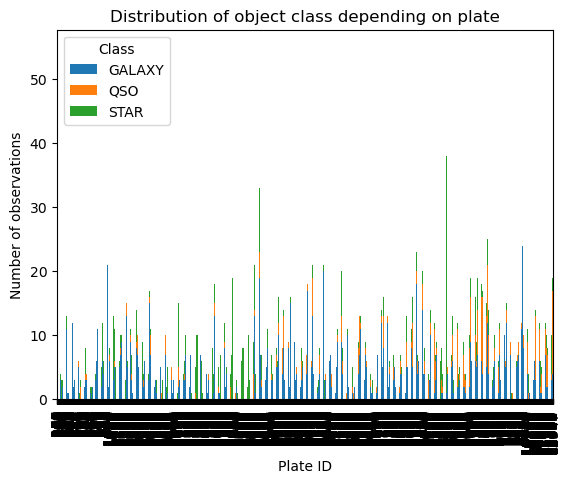

In [57]:
plt.figure(figsize = (10, 6))
train_df.groupby(["plate", "class"]).size().unstack().plot(kind = "bar", stacked = True)
plt.title("Distribution of object class depending on plate")
plt.xlabel("Plate ID")
plt.ylabel("Number of observations")
plt.legend(title = "Class")
plt.xticks(45)
plt.show()

<span style="color:red;">Ten wykres sie strasznie dlugo ładuje, a jeśli juz sie załaduje, to jest nieczytelny.</span>

Rozkład klas w danych. Ta heatmapa pokazuje rozkład klas w danych w zalezności od innych zmiennych kategorycznych: plate (identyfikator tablicy, identyfikuje każdą tablicę w SDSS), cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu), field_ID (numer pola do identyfikacji każdego pola). To pomoze zidentyfikować, czy klasy gwiazd są równomiernie rozłozone w róznych podgrupach danych.

<Axes: xlabel='class', ylabel='cam_col'>

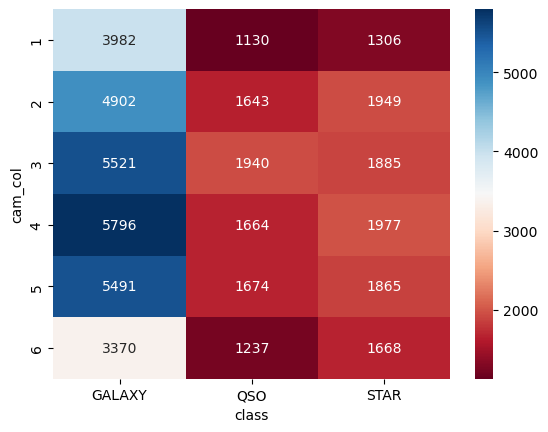

In [89]:
#class_distribution = train_df.groupby(["plate", "cam_col", "field_ID"])["class"].value_counts().unstack()
class_distribution = train_df.groupby(["cam_col"])["class"].value_counts().unstack()

# wypełnienie wartości NaN i inf zerami
class_distribution.replace([np.inf, -np.inf], np.nan, inplace=True)
class_distribution.fillna(0, inplace=True)

class_distribution = class_distribution.round().astype(int)
sns.heatmap(class_distribution, annot = True, cmap = "RdBu", fmt = "d")

## Zmienne numeryczne

Korelacja między zmiennymi numerycznymi:
- alpha (kąt prawego wzniesienia (w epoce J2000))
- delta (kąt deklinacji (w epoce J2000))
- u (Filtr ultrafioletowy w systemie fotometrycznym)
- g (filtr zielony w systemie fotometrycznym)
- r (filtr czerwony w systemie fotometrycznym)
- i (Filtr bliskiej podczerwieni w systemie fotometrycznym)
- z (Filtr podczerwieni w systemie fotometrycznym)
- redshift (wartość przesunięcia ku czerwieni oparta na wzroście długości fali).
Heatmapa korelacji między zmiennymi numerycznymi. To pomoze zidentyfikować, które zmienne mają silne korelacje ze sobą.


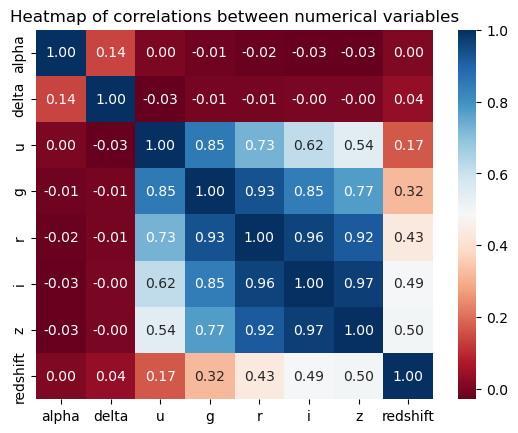

In [76]:
numerical_columns = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]
corr = train_df[numerical_columns].corr()   # korelacje między zmiennymi
sns.heatmap(corr, annot = True, cmap = "RdBu", fmt = ".2f")
plt.title("Heatmap of correlations between numerical variables")
plt.show()

Średnia wartość zmiennych numerycznych w róznych klasach. Heatmapa średnich wartości numerycznych ("alpha", "delta", "u", "g", "r", "i", "z", "redshift") w róznych klasach. To pomoze zidentyfikować, czy istnieją istotne róznice między tymi zmiennymi między klasami.

<Axes: ylabel='class'>

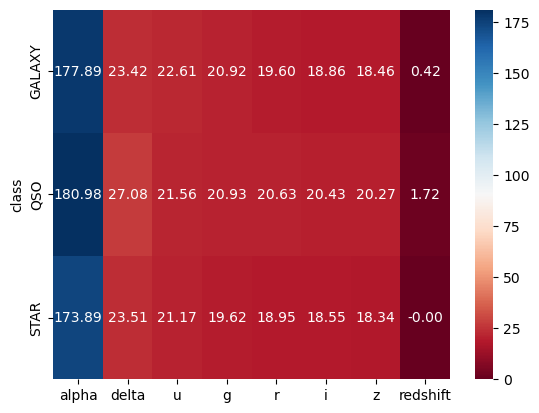

In [92]:
numeric_mean_by_class = train_df.groupby("class")[numerical_columns].mean()
sns.heatmap(numeric_mean_by_class, annot = True, cmap = "RdBu", fmt = ".2f")